<a href="https://www.kaggle.com/code/tamalkoley/indusin-bank-analysis?scriptVersionId=157583778" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime    
from pandas import Series 
import statsmodels.api as sm

In [2]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
sns.set_style("whitegrid")
%matplotlib inline

from prophet import Prophet
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset
indusin=pd.read_csv(r"/kaggle/input/nifty50-stock-market-data/INDUSINDBK.csv")

In [5]:
indusin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN


In [6]:
# Print shape of dataset with rows and columns and information
print("The shape of the data is (row, column):"+ str(indusin.shape))
print(indusin.info())

The shape of the data is (row, column):(4985, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4985 non-null   object 
 1   Symbol              4985 non-null   object 
 2   Series              4985 non-null   object 
 3   Prev Close          4985 non-null   float64
 4   Open                4985 non-null   float64
 5   High                4985 non-null   float64
 6   Low                 4985 non-null   float64
 7   Last                4985 non-null   float64
 8   Close               4985 non-null   float64
 9   VWAP                4985 non-null   float64
 10  Volume              4985 non-null   int64  
 11  Turnover            4985 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: fl

In [7]:
# checking the statistical measures
indusin.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4.985000e+03,4.985000e+03,2.456000e+03,4.797000e+03,4797.000000
mean,494.137563,494.856660,501.926409,486.991344,494.341986,494.322698,494.563232,2.351251e+06,1.531780e+14,7.324800e+04,7.596722e+05,0.489002
std,562.724997,563.200546,569.267316,556.232197,562.779367,562.718180,562.740212,5.664769e+06,3.679600e+14,1.090752e+05,1.099894e+06,0.189042
min,9.150000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,2.000000e+02,2.650000e+08,4.040000e+02,4.450000e+03,0.029900
25%,48.400000,48.800000,49.800000,47.300000,48.450000,48.450000,48.670000,4.119510e+05,3.268398e+12,1.744125e+04,1.977390e+05,0.350900
50%,255.100000,255.000000,261.400000,250.700000,255.100000,255.250000,255.430000,8.692310e+05,1.972708e+13,3.749000e+04,4.267010e+05,0.480000
75%,873.950000,875.000000,886.000000,858.500000,874.000000,874.550000,872.830000,1.772702e+06,1.118311e+14,8.079375e+04,8.737870e+05,0.620500
max,2023.050000,2033.100000,2038.000000,2003.450000,2022.000000,2023.050000,2022.360000,8.133645e+07,4.942748e+15,1.424793e+06,1.782411e+07,1.000000


In [8]:
# Creating a copy
indusin_copy = indusin.copy()

# Converting date column to datetime data type
indusin_copy['Date'] = indusin_copy['Date'].apply(pd.to_datetime)

# Extracting Month, Week, Day, Day of week
indusin_copy["Month"] = indusin_copy.Date.dt.month
# Extracting Week of the year using strftime('%U')
# Note: The .astype(int) is used to convert the week from string to integer
indusin_copy["Week"] = indusin_copy.Date.dt.strftime('%U').astype(int) #
indusin_copy["Day"] = indusin_copy.Date.dt.day
indusin_copy["Day of week"] = indusin_copy.Date.dt.dayofweek

# Setting date column as index
indusin_copy.set_index("Date", drop=False, inplace=True)
indusin_copy.iloc[:, 15:19].head()


,Month,Week,Day,Day of week
Date,,,,
2000-01-03,1,1,3,0
2000-01-04,1,1,4,1
2000-01-05,1,1,5,2
2000-01-06,1,1,6,3
2000-01-07,1,1,7,4


In [9]:
indusin_copy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Month,Week,Day,Day of week
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN,1,1,3,0
2000-01-04,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN,1,1,4,1
2000-01-05,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN,1,1,5,2
2000-01-06,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN,1,1,6,3
2000-01-07,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN,1,1,7,4


In [10]:
# Checking for null values
indusin_copy.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2529
Deliverable Volume     188
%Deliverble            188
Month                    0
Week                     0
Day                      0
Day of week              0
dtype: int64

In [11]:
# Check data types of columns
numeric_columns = indusin_copy.select_dtypes(include=[np.number]).columns

# Input null values with mean for numeric columns
indusin_copy[numeric_columns] = indusin_copy[numeric_columns].fillna(indusin_copy[numeric_columns].mean())

# Verify that there are no more missing values
missing_values = indusin_copy.isnull().sum()
print("Remaining Missing Values:\n", missing_values)


Remaining Missing Values:
 Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Month                 0
Week                  0
Day                   0
Day of week           0
dtype: int64


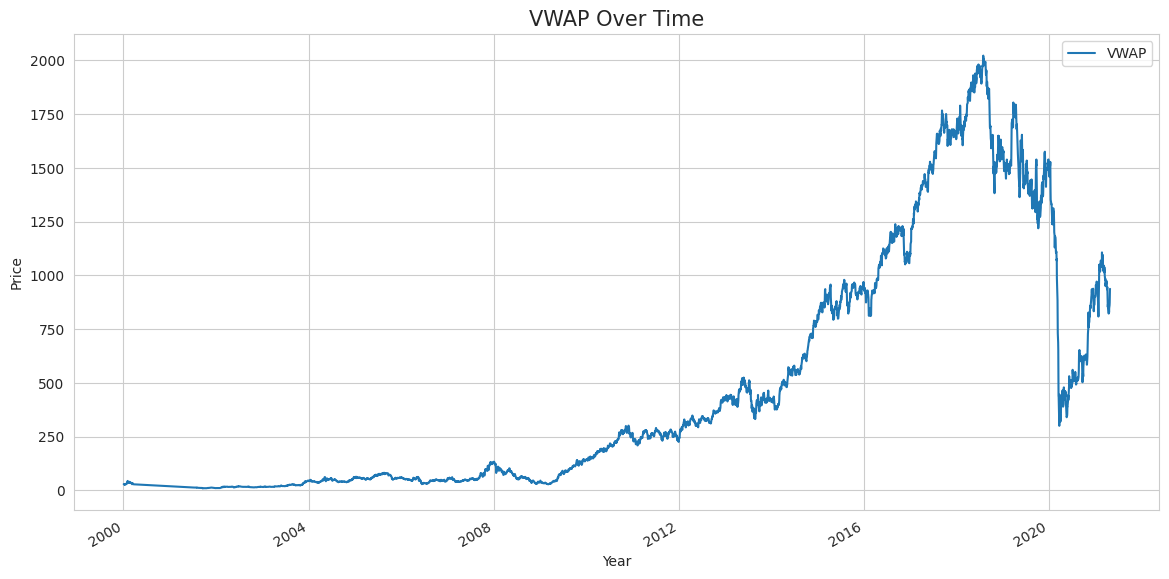

In [12]:
# Assuming 'Date' is a datetime column, if not, convert it to datetime first
indusin['Date'] = pd.to_datetime(indusin['Date'])

# Plotting with year on the x-axis
indusin.plot(x='Date', y='VWAP', figsize=(14, 7))
plt.title('VWAP Over Time', fontsize=15)
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

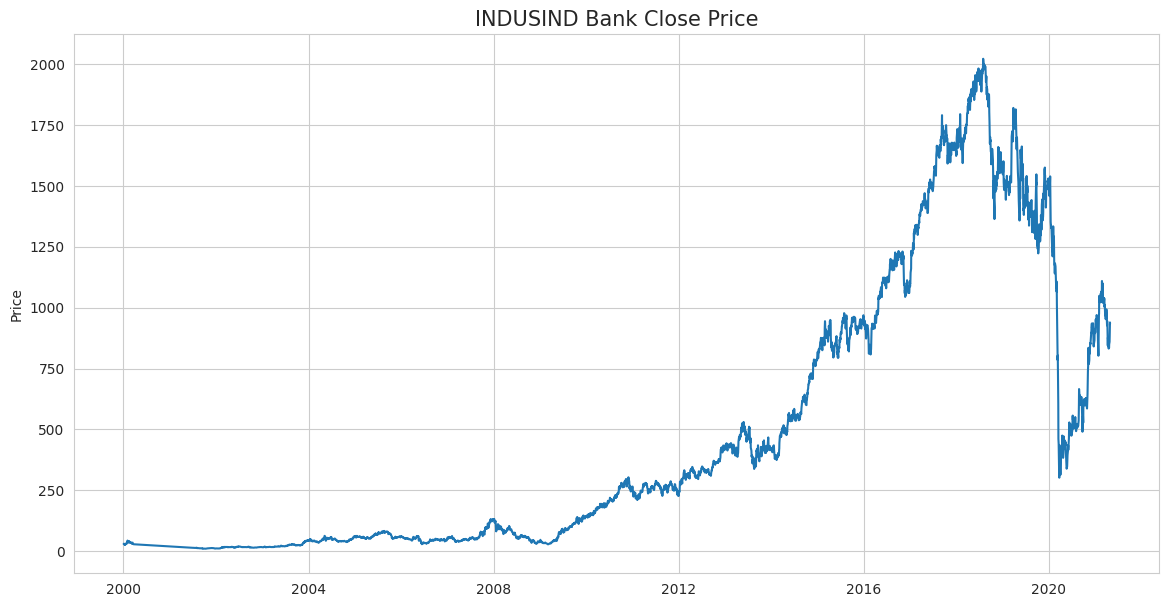

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(indusin_copy['Close'])
plt.title('INDUSIND Bank Close Price', fontsize = 15)
plt.ylabel('Price')
plt.show()


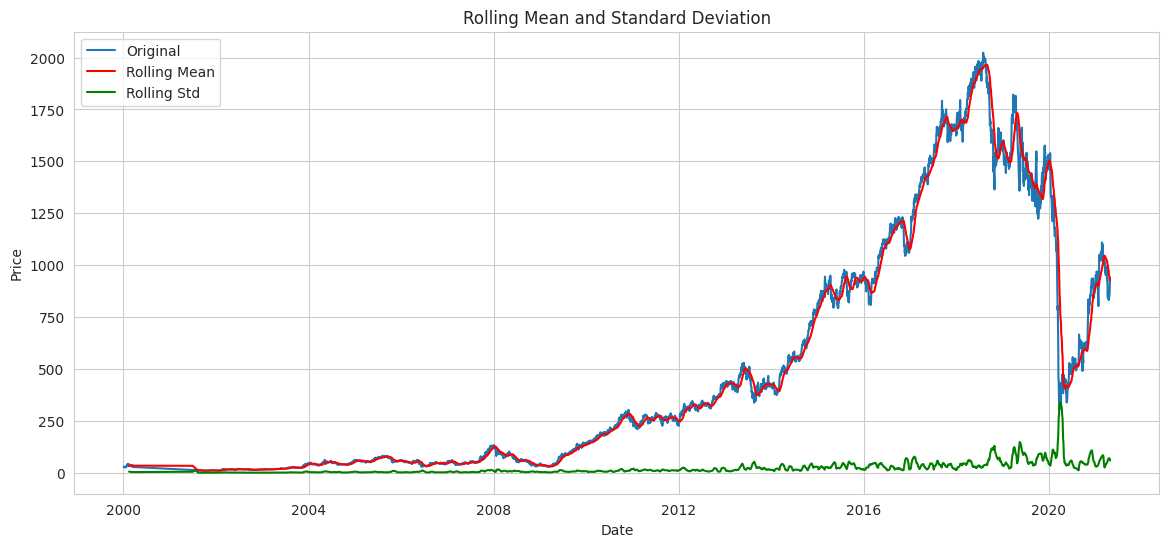

In [14]:
# Rolling mean and standard deviation
rolling_mean = indusin_copy['Close'].rolling(window=30).mean()
rolling_std = indusin_copy['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(indusin_copy['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color ='r')
plt.plot(rolling_std, label='Rolling Std', color='g')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

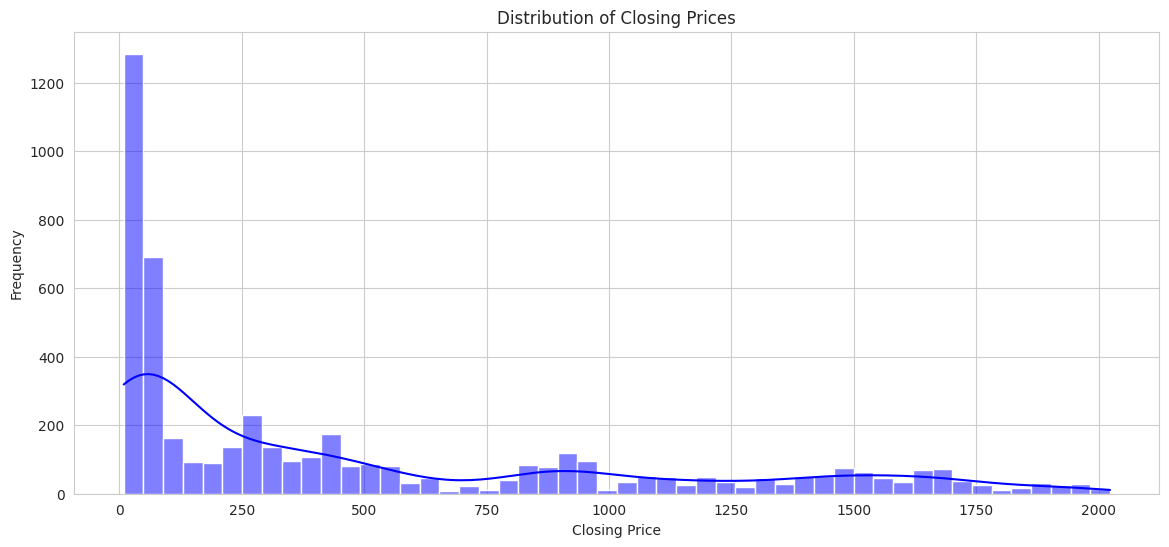

In [15]:
# Distribution plot of the closing prices
plt.figure(figsize=(14, 6))
sns.histplot(indusin_copy['Close'], kde=True, bins=50, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

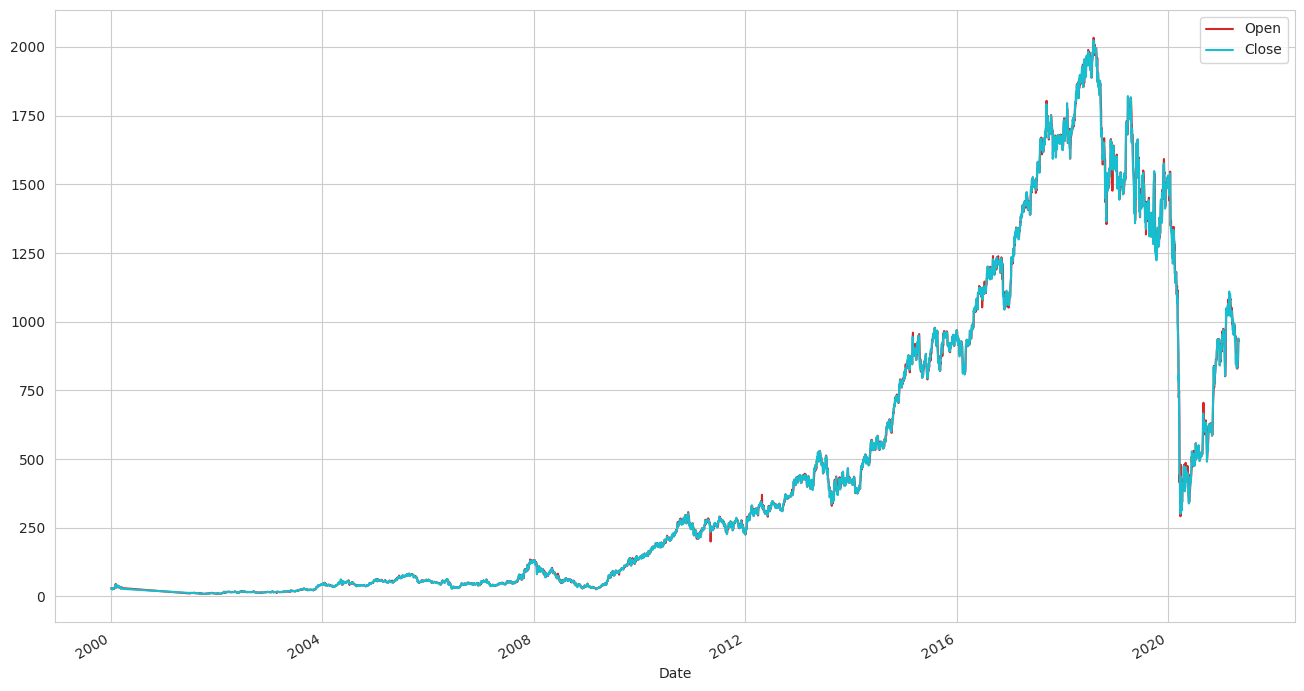

In [16]:
fog, ax = plt.subplots(figsize=(16, 9))
indusin_copy.plot(ax=ax, x='Date', y='Open', color=color_pal[3])
indusin_copy.plot(ax=ax, x='Date', y='Close', color=color_pal[9])
plt.show()


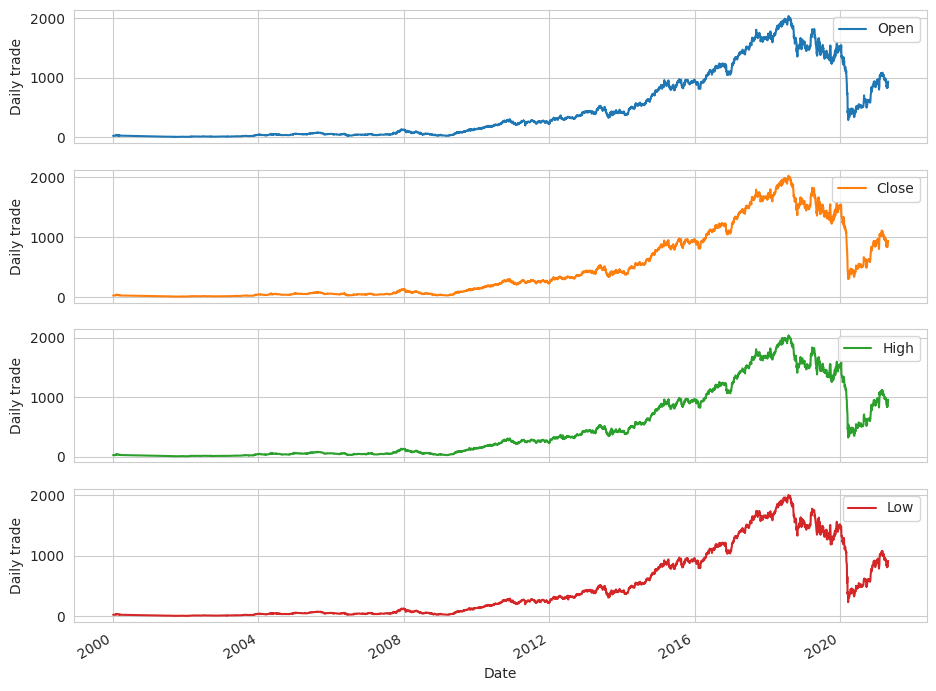

In [17]:
cols_plot = ['Open', 'Close', 'High', 'Low']
axes = indusin_copy[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [18]:
## Volume over time
fig = go.Figure([go.Scatter(x=indusin_copy.index, y = indusin_copy['Volume'])])
fig.update_layout(autosize=False, width=950, height=500, template='simple_white', title='Volume Over Time')
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

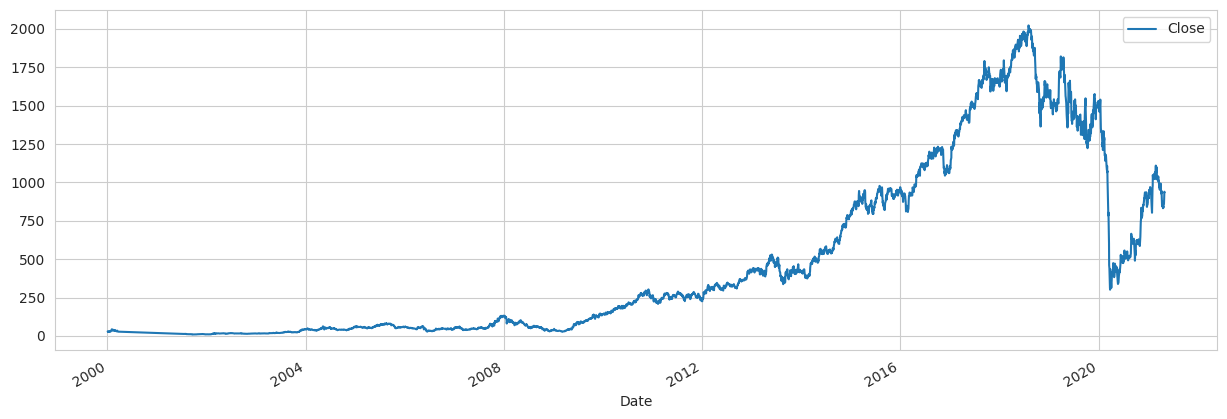

In [19]:
## Stationary
# Visually checking for stationary
indusin_stationary = indusin_copy[['Close']]
indusin_stationary.plot(figsize=(15, 5), subplots=True);

In [20]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(indusin_stationary['Close'])

#H0: Data is non stationary
#H1: Data is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+':'+str(value))
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
        
adfuller_test(indusin_stationary['Close'])

ADF Test Statistic:-1.1558715605581946
p-value:0.6922849688966933
#Lags Used:32
Number of Observations Used:4952
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


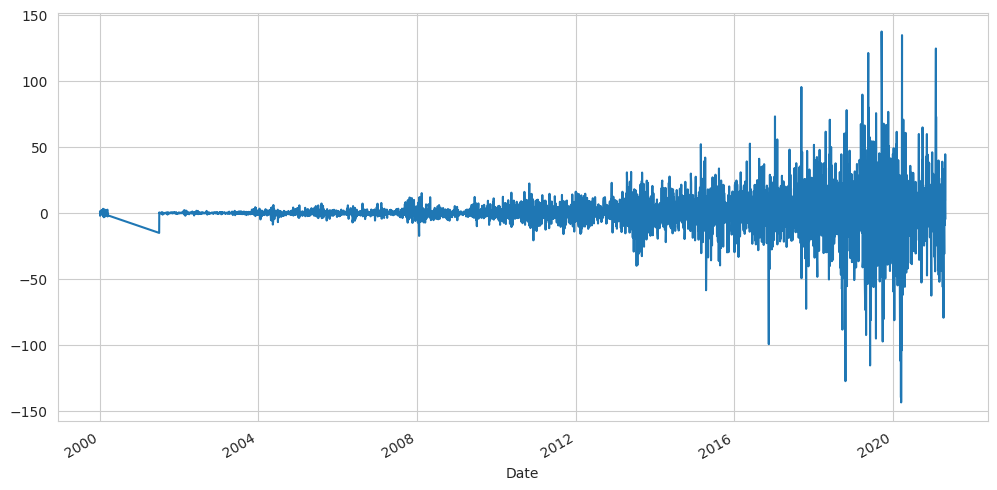

In [21]:
# Convert stationary into non-stationary
indusin_stationary['Close First Difference']=indusin_stationary['Close']-indusin_stationary['Close'].shift(1)
indusin_stationary['Close First Difference'].plot(figsize=(12,6));

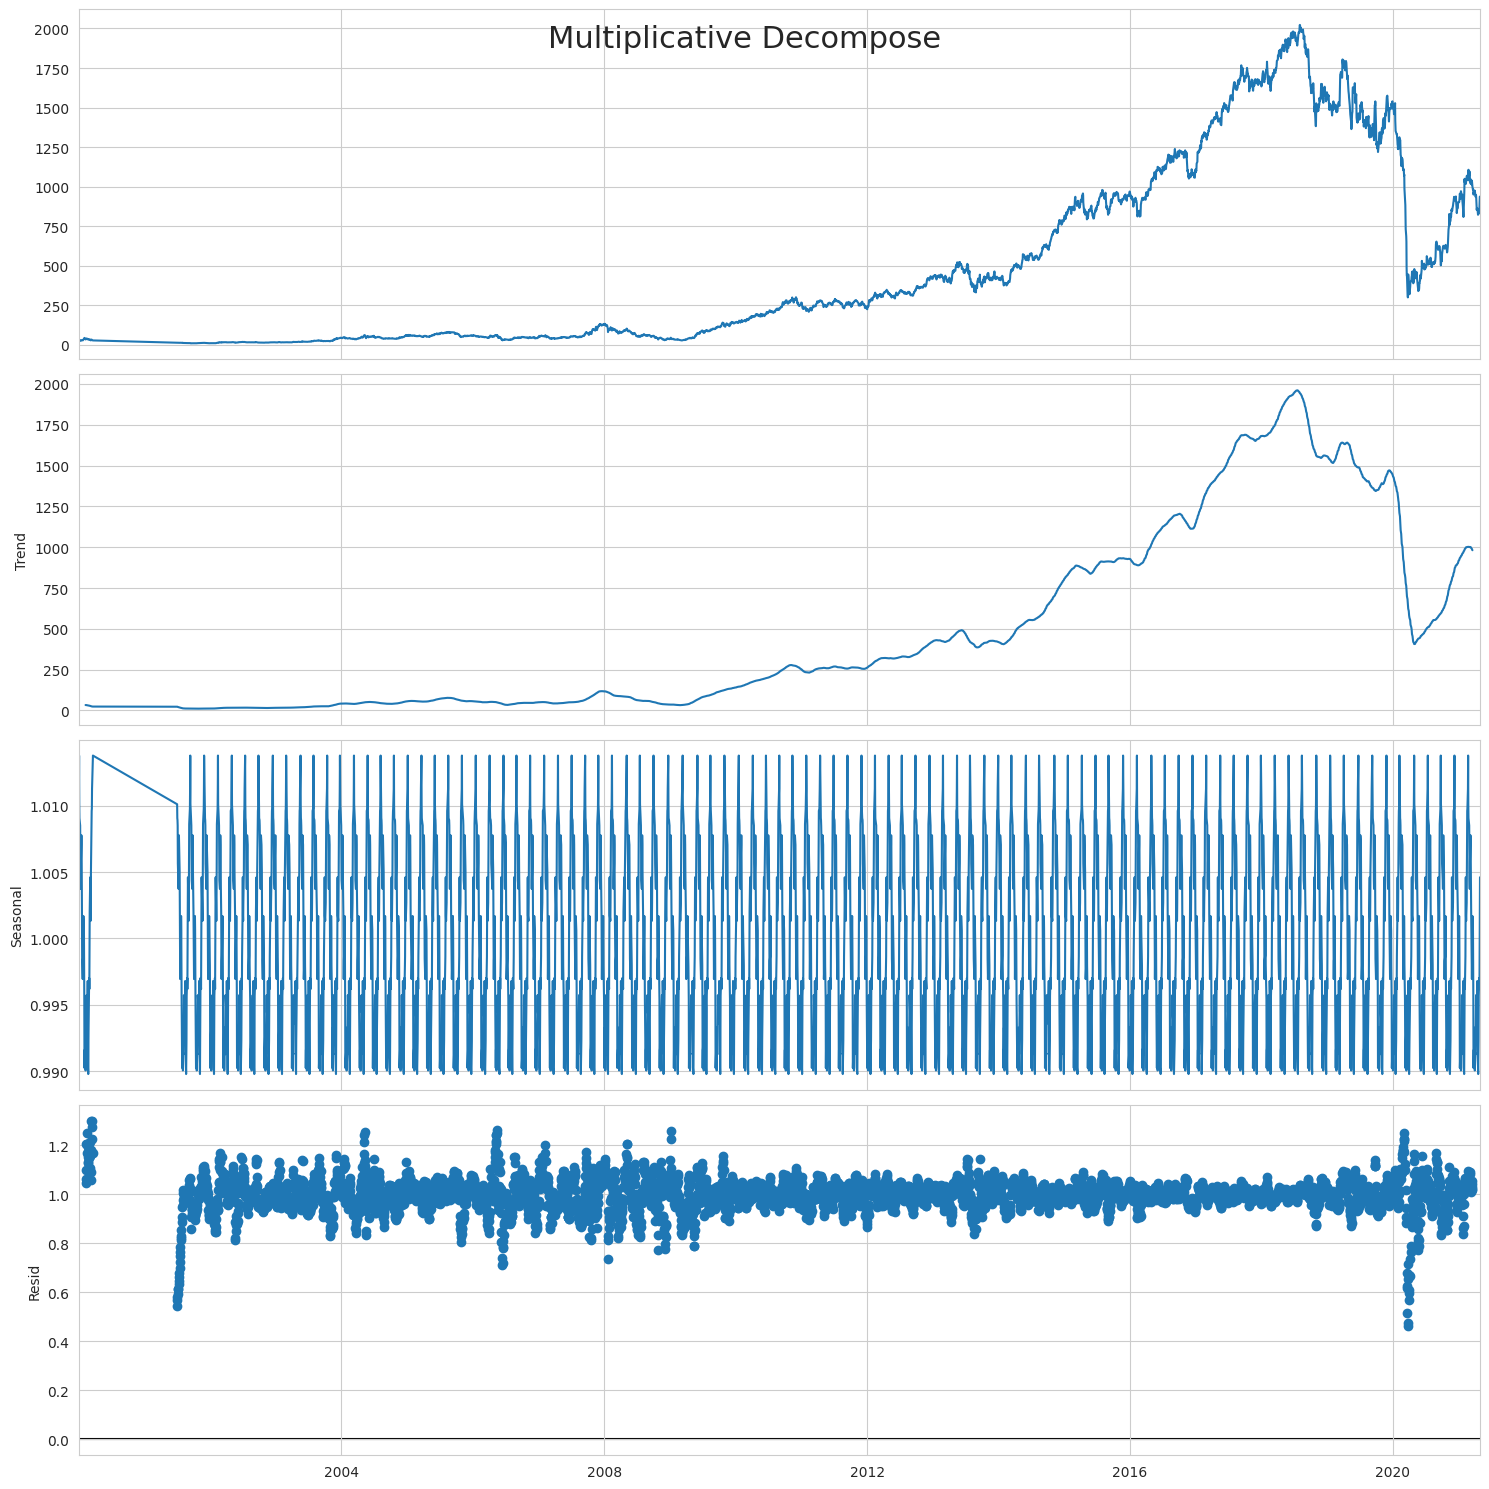

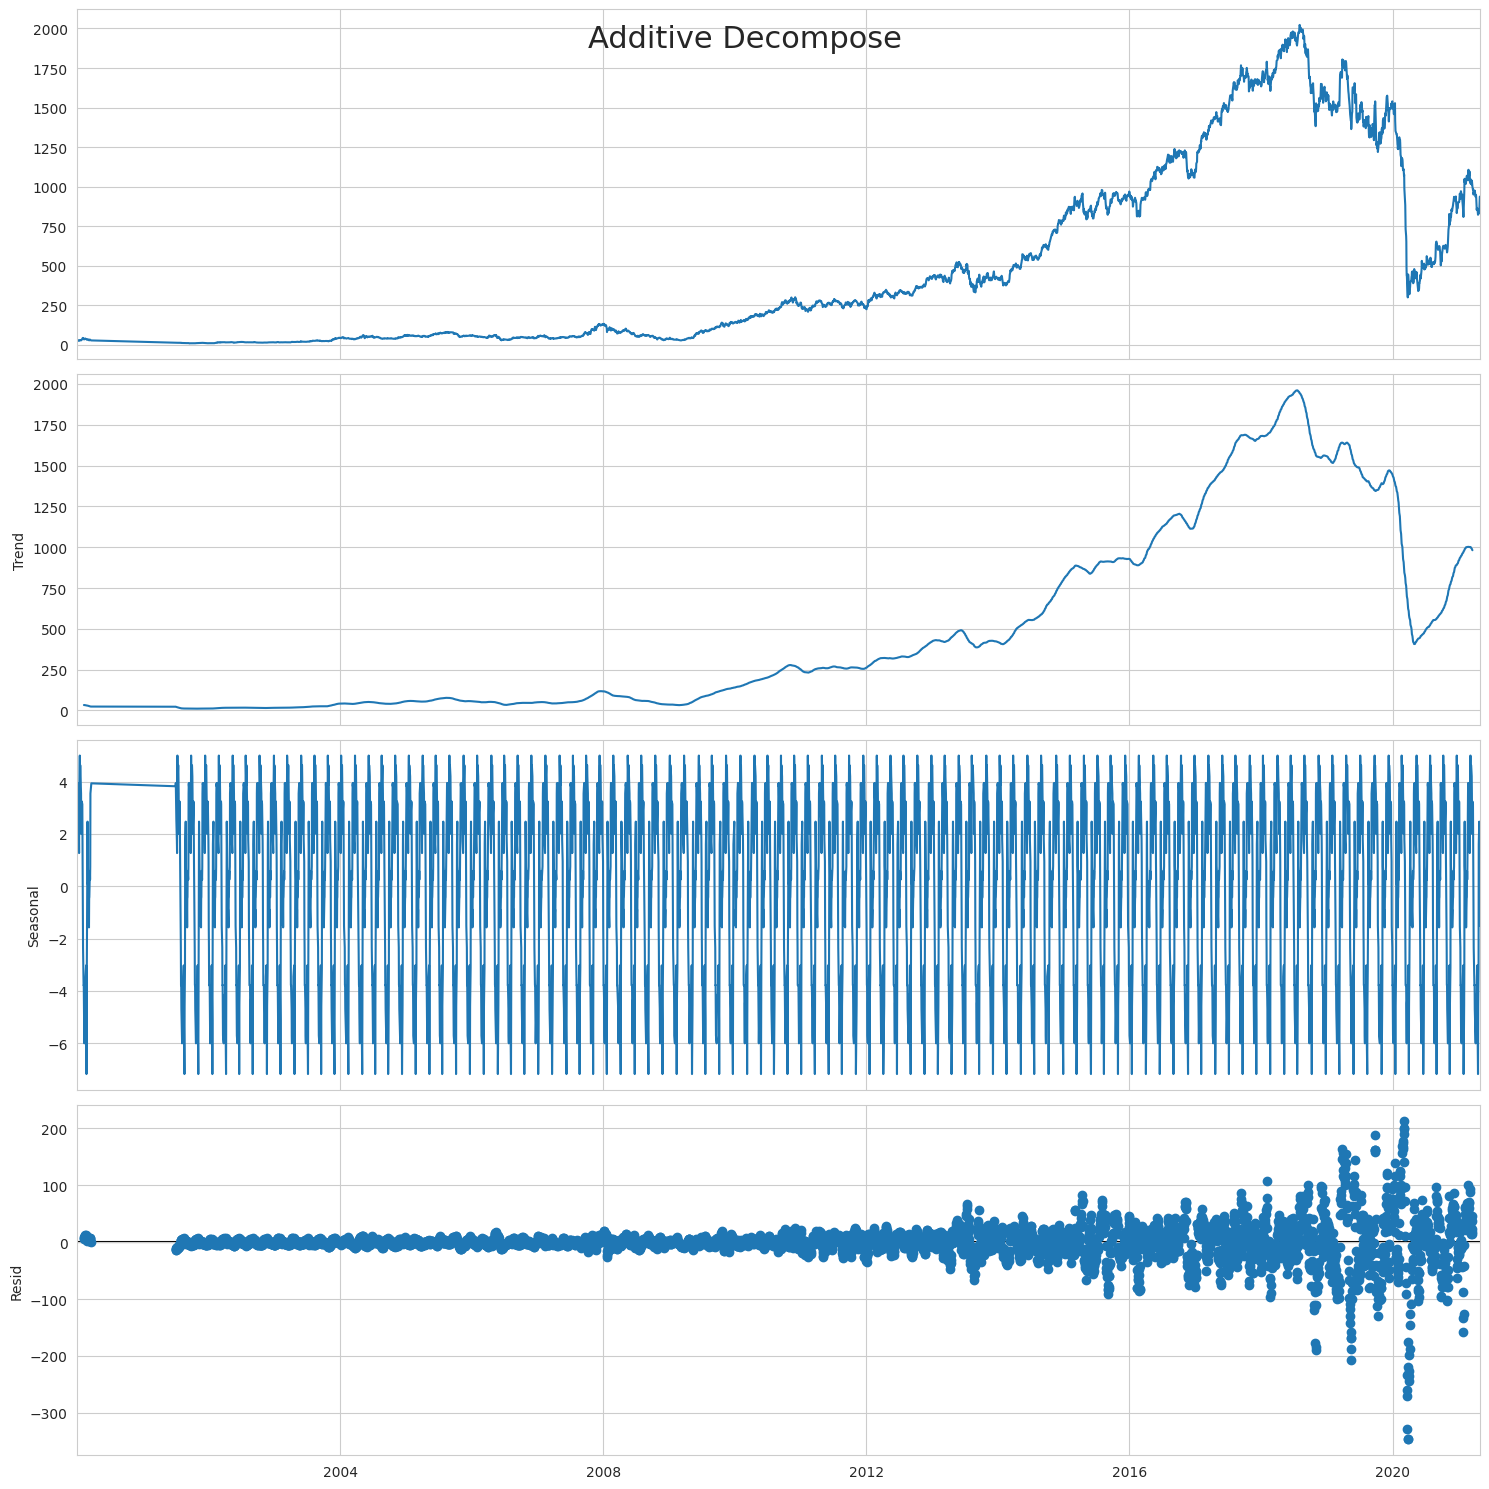

In [22]:
#Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize':(18, 18)})
y = indusin_copy['VWAP'].to_frame()

#Multiplicative Decomposition
result_mul = seasonal_decompose(y, model='multiplicative', period = 52)

#Additive Decomposition
result_add = seasonal_decompose(y, model='additive', period= 52)

#Plot
plt.rcParams.update({'figure.figsize': (15, 15)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

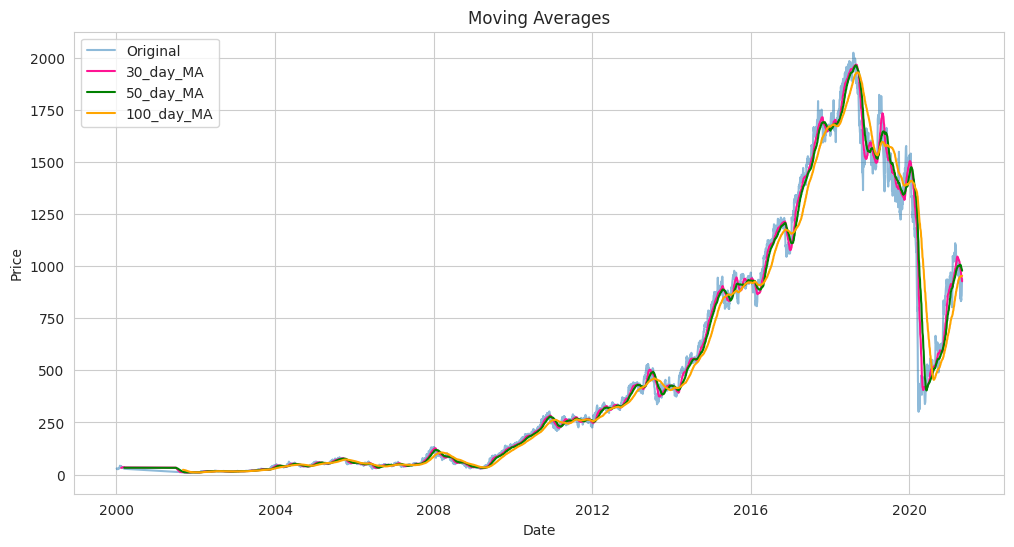

In [23]:
## Moving Average (MA)
# Compute moving averages for 30, 50, and 100 days
indusin_copy['30_day_MA']=indusin_copy['Close'].rolling(window=30).mean()
indusin_copy['50_day_MA']=indusin_copy['Close'].rolling(window=50).mean()
indusin_copy['100_day_MA']=indusin_copy['Close'].rolling(window=100).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(indusin_copy['Close'], label='Original', alpha=0.5)
plt.plot(indusin_copy['30_day_MA'], label='30_day_MA', color='deeppink')
plt.plot(indusin_copy['50_day_MA'], label='50_day_MA', color='green')
plt.plot(indusin_copy['100_day_MA'], label='100_day_MA', color='orange')
plt.legend(loc='best')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

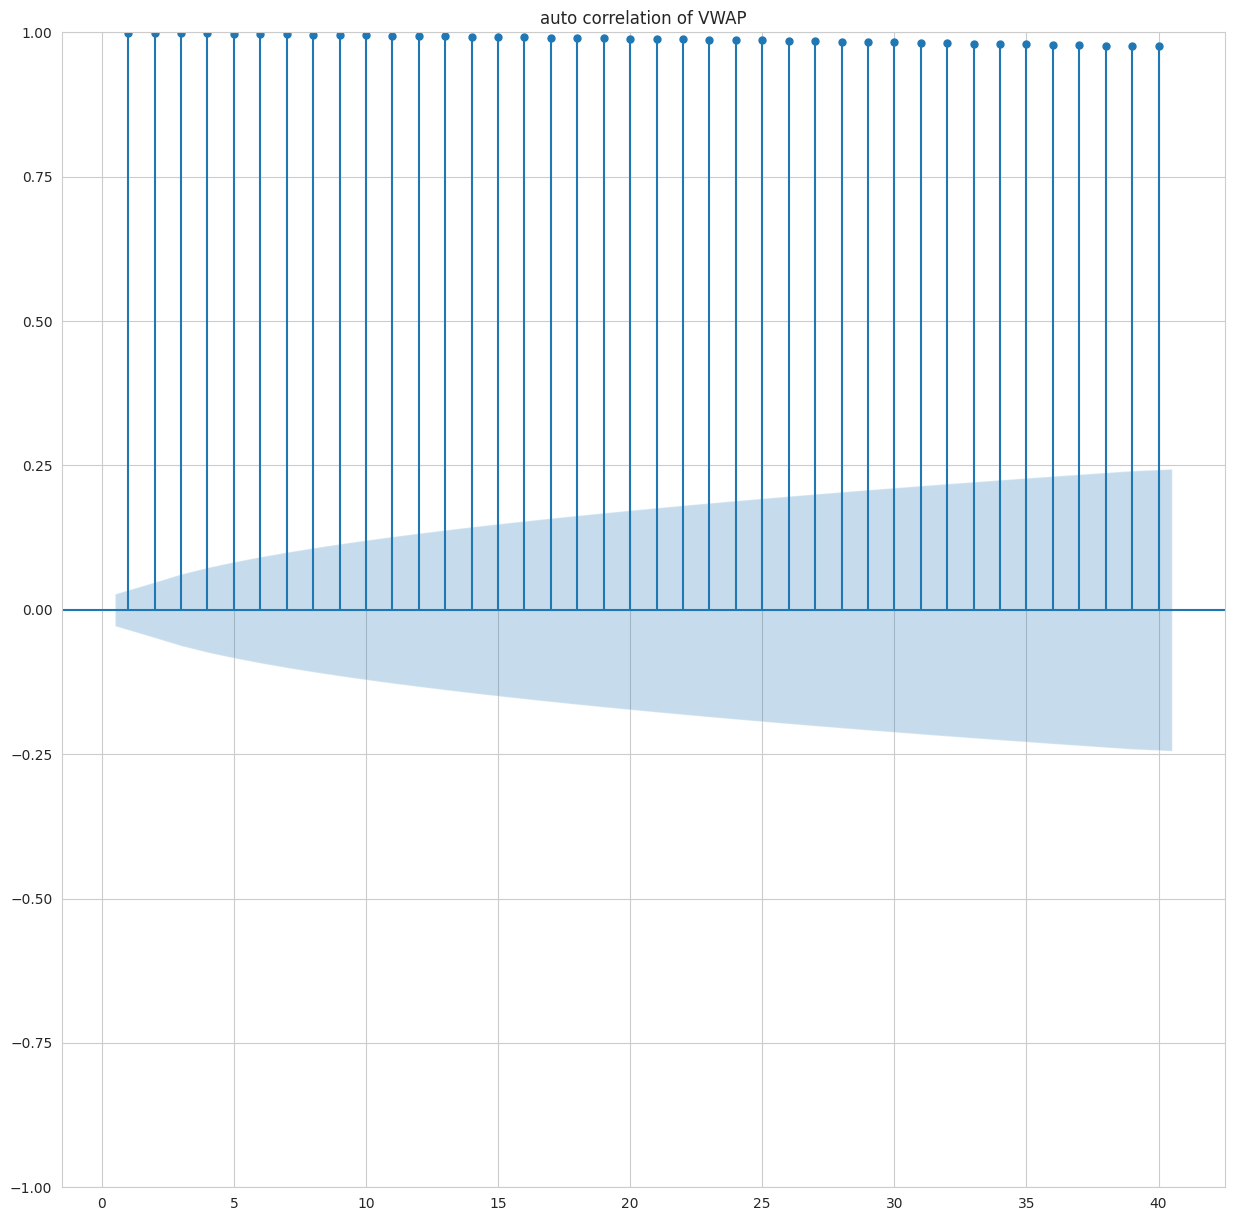

In [24]:
#Autocorrelation and partial autocorrelation
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(indusin_copy['VWAP'].iloc[1:], lags=40, title='auto correlation of VWAP', zero= False)
plt.show()

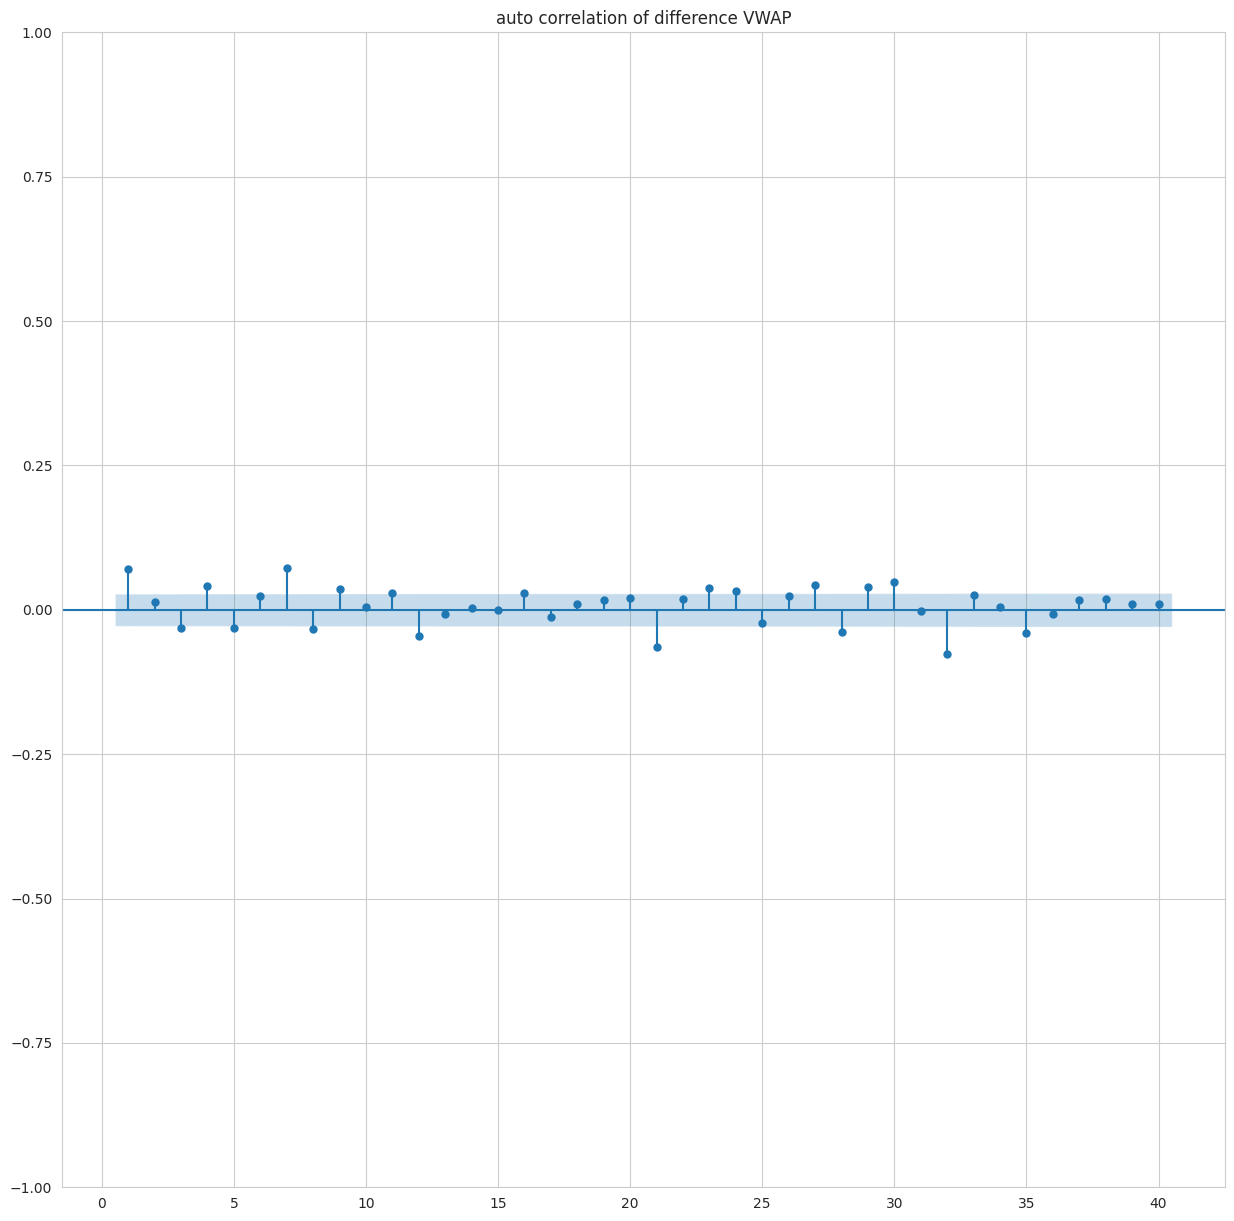

In [25]:
sm.graphics.tsa.plot_acf(indusin_stationary['Close First Difference'].iloc[7:], lags=40,title='auto correlation of difference VWAP',zero=False)
plt.show()

In [26]:
indusin = indusin.reset_index()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
indusin_lr = indusin.copy()
indusin_lr.drop('Date', axis = 1, inplace = True)
indusin_lr.drop('Symbol', axis = 1, inplace = True)
indusin_lr.drop('Series', axis = 1, inplace = True)
indusin_lr.drop(['Trades', 'Deliverable Volume', '%Deliverble'], axis=1, inplace=True)
x = indusin_lr.drop('Close', axis=1)
y = indusin_lr['Close']

In [28]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
# Train the Linear Regression Model
model.fit(x_train, y_train)

LinearRegression()

In [29]:
np.isnan(x.values.any())

False

In [30]:
preds = model.predict(x_test)
from sklearn.metrics import r2_score

# Evaluate the model's accuracy
accuracy = r2_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9999904302348491


In [31]:
##Auto Arima(Autoregressive Integrated Moving Average)
indusin = pd.read_csv(r"/kaggle/input/nifty50-stock-market-data/INDUSINDBK.csv")
indusin.set_index("Date", drop=False, inplace=True)
indusin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN
2000-01-04,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN
2000-01-05,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN
2000-01-06,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN
2000-01-07,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN


In [32]:
indusin.reset_index(drop=True, inplace=True)

In [33]:
indusin['Date'] = pd.to_datetime(indusin['Date'])
indusin.set_index('Date', inplace=True)

lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

indusin = indusin.apply(pd.to_numeric, errors='coerce')

indusin_rolled_3d = indusin[lag_features].rolling(window=window1, min_periods=0)
indusin_rolled_7d = indusin[lag_features].rolling(window=window2, min_periods=0)
indusin_rolled_30d = indusin[lag_features].rolling(window=window3, min_periods=0)

indusin_mean_3d = indusin_rolled_3d.mean().shift(1).astype(np.float32)
indusin_mean_7d = indusin_rolled_7d.mean().shift(1).astype(np.float32)
indusin_mean_30d = indusin_rolled_30d.mean().shift(1).astype(np.float32)

indusin_std_3d = indusin_rolled_3d.std().shift(1).astype(np.float32)
indusin_std_7d = indusin_rolled_7d.std().shift(1).astype(np.float32)
indusin_std_30d = indusin_rolled_30d.std().shift(1).astype(np.float32)

for feature in lag_features:
    indusin[f"{feature}_mean_lag{window1}"] = indusin_mean_3d[feature]
    indusin[f"{feature}_mean_lag{window2}"] = indusin_mean_7d[feature]
    indusin[f"{feature}_mean_lag{window3}"] = indusin_mean_30d[feature]
    
    indusin[f"{feature}_std_lag{window1}"] = indusin_std_3d[feature]
    indusin[f"{feature}_std_lag{window2}"] = indusin_std_7d[feature]
    indusin[f"{feature}_std_lag{window3}"] = indusin_std_30d[feature]

indusin.fillna(indusin.mean(), inplace=True)

# Reset the index to make "Date" a separate column
indusin.reset_index(inplace=True)
indusin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
0,2000-01-03,NaN,NaN,26.80,28.90,28.95,28.00,28.95,28.95,28.69,...,1.511168e+14,5.163942e+13,6.515949e+13,8.308431e+13,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562
1,2000-01-04,NaN,NaN,28.95,30.85,31.25,27.90,30.60,30.25,29.12,...,3.075827e+11,5.163942e+13,6.515949e+13,8.308431e+13,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562
2,2000-01-05,NaN,NaN,30.25,29.90,30.00,27.85,28.45,28.15,28.72,...,4.198279e+11,1.587387e+11,1.587387e+11,1.587387e+11,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562
3,2000-01-06,NaN,NaN,28.15,29.25,29.35,27.95,27.95,28.00,28.55,...,4.357425e+11,1.155803e+11,1.155803e+11,1.155803e+11,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562
4,2000-01-07,NaN,NaN,28.00,27.20,28.00,26.50,27.20,27.05,27.09,...,3.895571e+11,1.472329e+11,1.320540e+11,1.320540e+11,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562


In [34]:
indusin.Date = pd.to_datetime(indusin.Date, format="%Y-%m-%d")
indusin["month"] = indusin.Date.dt.month
indusin["week"] = indusin.Date.dt.isocalendar().week
indusin["day"] = indusin.Date.dt.day
indusin["day_of_week"] = indusin.Date.dt.dayofweek
indusin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
0,2000-01-03,NaN,NaN,26.80,28.90,28.95,28.00,28.95,28.95,28.69,...,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562,1,1,3,0
1,2000-01-04,NaN,NaN,28.95,30.85,31.25,27.90,30.60,30.25,29.12,...,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562,1,1,4,1
2,2000-01-05,NaN,NaN,30.25,29.90,30.00,27.85,28.45,28.15,28.72,...,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562,1,1,5,2
3,2000-01-06,NaN,NaN,28.15,29.25,29.35,27.95,27.95,28.00,28.55,...,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562,1,1,6,3
4,2000-01-07,NaN,NaN,28.00,27.20,28.00,26.50,27.20,27.05,27.09,...,73152.179688,73049.601562,72408.507812,22407.621094,27700.072266,34865.101562,1,1,7,4


In [35]:
# Splitting the data into train and validation along with features.

indusin_train = indusin[indusin.Date < "2020"]
indusin_valid = indusin[indusin.Date >="2020"]

In [36]:
exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [37]:
model = auto_arima(indusin_train.VWAP, exogenous=indusin_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(indusin_train.VWAP, exogenous=indusin_train[exogenous_features])

forecast = model.predict(n_periods=len(indusin_valid), exogenous=indusin_valid[exogenous_features])
indusin_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=35804.164, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36019.211, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=35865.022, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=35828.362, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36020.734, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=35802.172, Time=0.95 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=35808.571, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=35814.992, Time=0.72 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=35803.951, Time=1.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=35802.027, Time=1.40 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=35803.975, Time=2.20 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=35805.951, Time=2.50 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=35803.182, Time=0.52 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 14.114 seconds


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4653
Model:               SARIMAX(0, 1, 3)   Log Likelihood              -17896.014
Date:                Wed, 03 Jan 2024   AIC                          35802.027
Time:                        17:54:13   BIC                          35834.252
Sample:                             0   HQIC                         35813.363
                               - 4653                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3188      0.182      1.755      0.079      -0.037       0.675
ma.L1          0.2036      0.006     32.183      0.000       0.191       0.216
ma.L2         -0.0787      0.007    -10.792      0.000      -0.093      -0.064
ma.L3         -0.0465      0.007     -6.794      0.000      -0.060      -0.033
sigma2       128.5133      0.836    153.731      0.000     126.875     130.152
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             87702.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             191.01   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
indusin_valid.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Volume_mean_lag3', 'Volume_mean_lag7',
       'Volume_mean_lag30', 'Volume_std_lag3', 'Volume_std_lag7',
       'Volume_std_lag30', 'Turnover_mean_lag3', 'Turnover_mean_lag7',
       'Turnover_mean_lag30', 'Turnover_std_lag3', 'Turnover_std_lag7',
       'Turnover_std_lag30', 'Trades_mean_lag3', 'Trades_mean_lag7',
       'Trades_mean_lag30', 'Trades_std_lag3', 'Trades_std_lag7',
       'Trades_std_lag30', 'month', 'week', 'day', 'day_of_week',
       'Forecast_ARIMAX'],
      dtype='object')

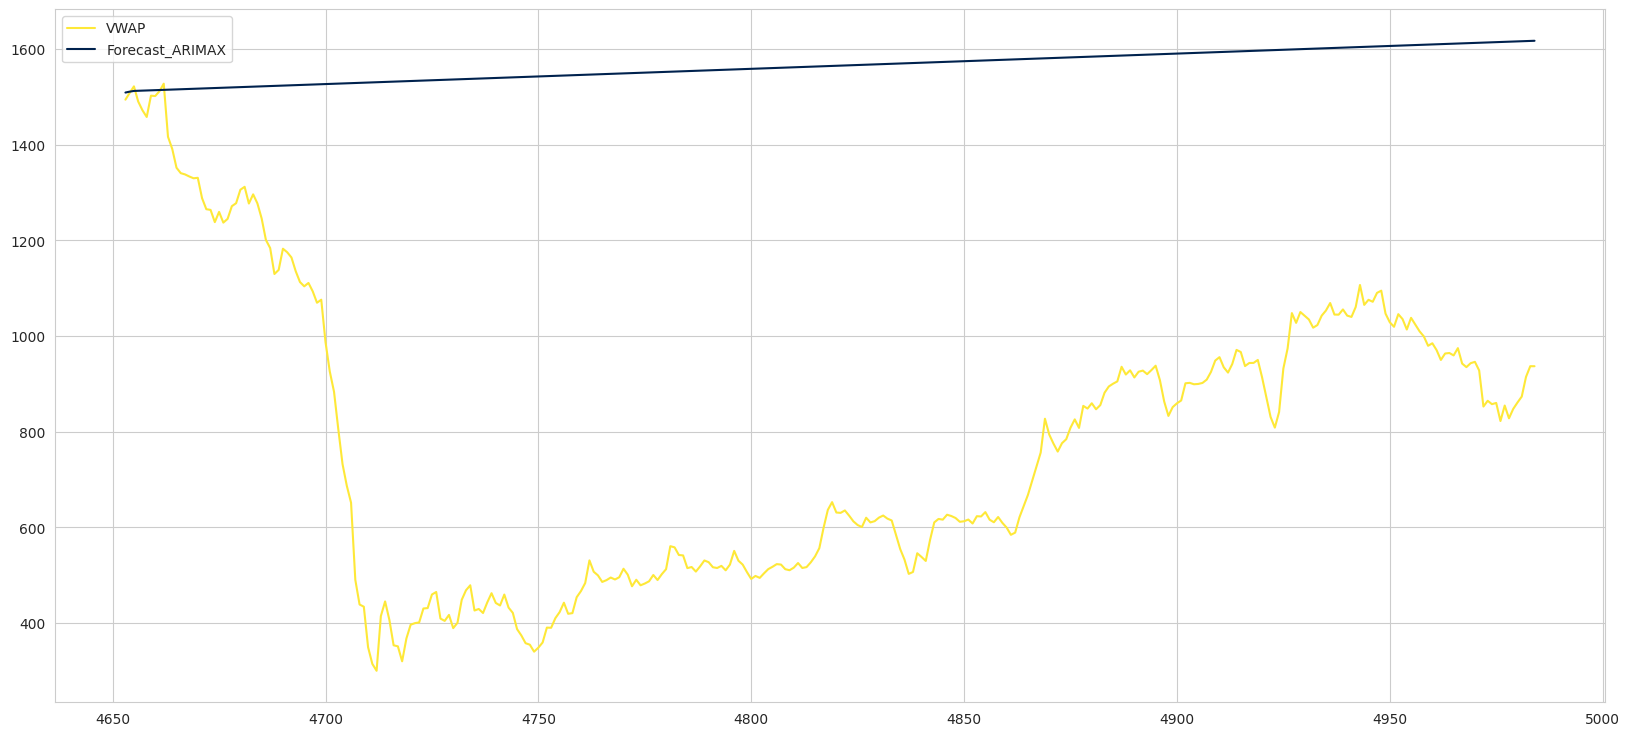

In [40]:
indusin_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(20, 9), cmap='cividis_r');

In [41]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(indusin_valid.VWAP, indusin_valid.Close)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(indusin_valid.VWAP, indusin_valid.Close))

RMSE of Auto ARIMAX: 11.68474988261525

MAE of Auto ARIMAX: 8.17225903614458
